In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

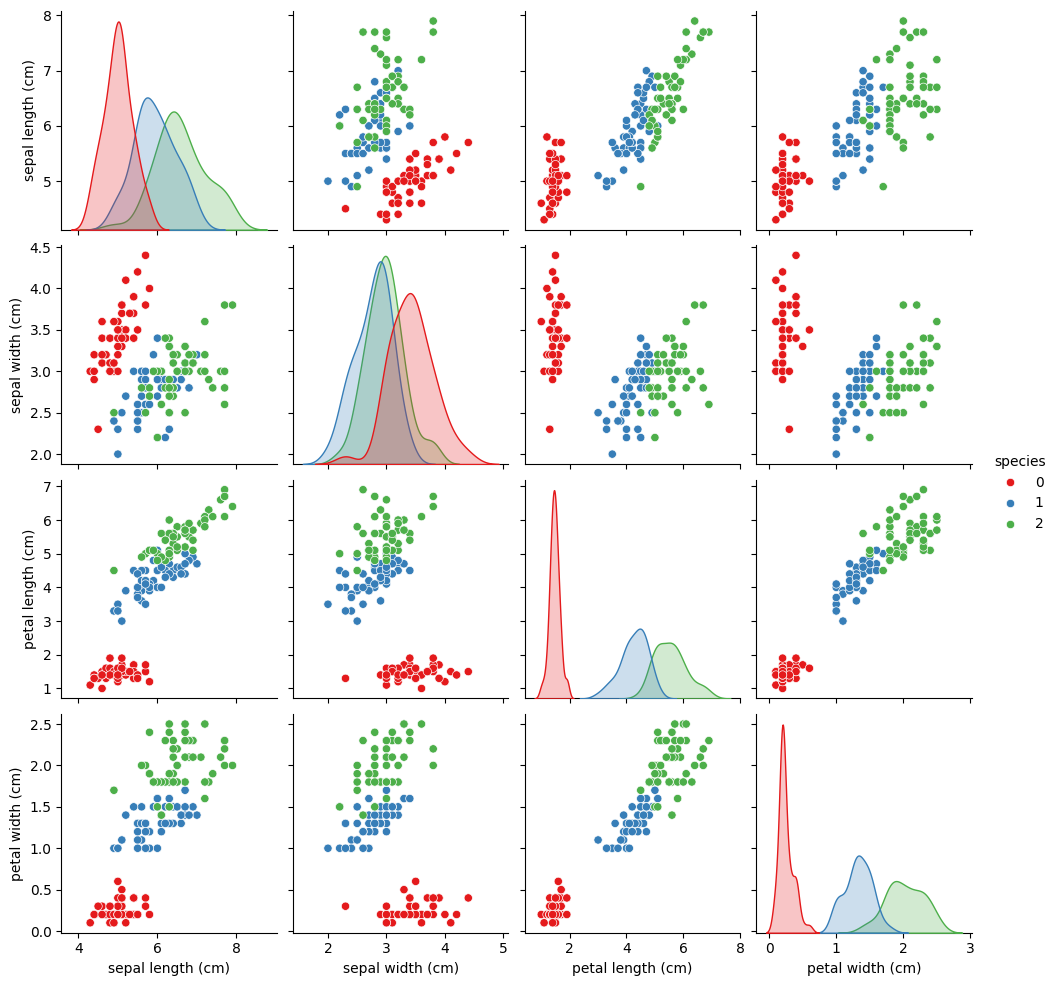

In [7]:
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



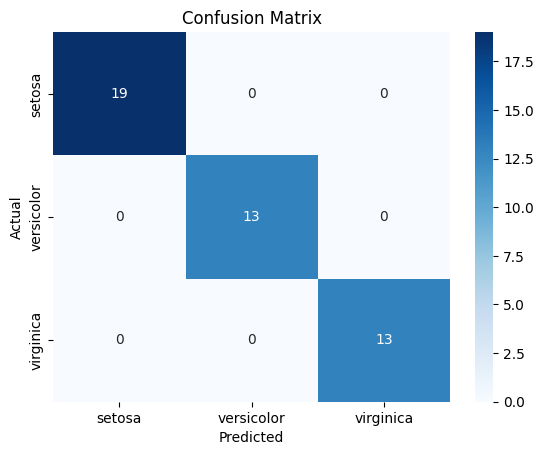

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

model_pca = LogisticRegression(max_iter=200)
model_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(max_iter=200)

In [14]:
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

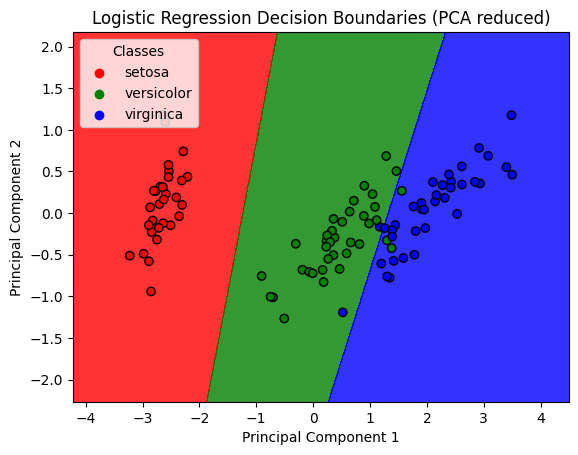

In [17]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, edgecolor='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))

plt.title('Logistic Regression Decision Boundaries (PCA reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

unique_classes = np.unique(y_train_pca)
for i, class_value in enumerate(unique_classes):
    plt.scatter([], [], color=ListedColormap(('red', 'green', 'blue'))(i), label=iris.target_names[class_value])
plt.legend(title="Classes", loc='upper left')

plt.show()